<a href="https://colab.research.google.com/github/shairatabassum/PyTorch_Learning/blob/main/PyTorch_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning with PyTorch** (part II)
A PyTorch notebook that I created while learning PyTorch through a series of tutorials on YouTube.

Source: [PyTorch Tutorials - Complete Beginner Course](https://www.youtube.com/watch?v=EMXfZB8FVUA&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4)

Dataset: [Wine](https://github.com/python-engineer/pytorchTutorial/blob/master/data/wine/wine.csv)

> **Table of contents**
> *  Linear Regression
> *  Logistic Regression
> *  Dataset and DataLoader
> *  Dataset Transforms
> *  Softmax Function and Cross-Entropy Loss
> *  A Neural Network Example
> *  Activation Functions

### **Linear Regression**

In [ ]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# convert into torch tensors
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

#reshape y tensor
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [ ]:
# design the model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# define the loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss() # mean square error loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stochastic gradient descent

# training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_pred = model(X)
  loss = criterion(y_pred, y)

  # backward pass
  loss.backward()

  # update weights
  optimizer.step()
  optimizer.zero_grad()

  if((epoch+1) % 10 == 0):
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4372.7114
epoch: 20, loss = 3262.1604
epoch: 30, loss = 2458.8010
epoch: 40, loss = 1877.0297
epoch: 50, loss = 1455.3043
epoch: 60, loss = 1149.3115
epoch: 70, loss = 927.1013
epoch: 80, loss = 765.6057
epoch: 90, loss = 648.1499
epoch: 100, loss = 562.6675


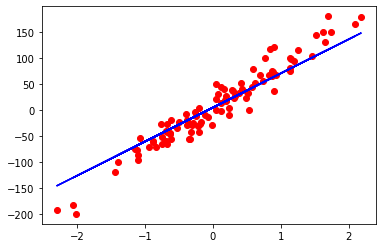

In [ ]:
# plot
pred = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, pred, 'b')
plt.show()

### **Logistic Regression**

In [ ]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# prepare data (Breast Cancer Dataset from sklearn)
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

569 30


In [ ]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale the features (it makes the features to have zero means and unit variance)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape y tensors
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [ ]:
# design the model
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = LogisticRegression(n_features)

# define the loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss() # binary cross entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stochastic gradient descent

# training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)

  # backward pass
  loss.backward()

  # update weights
  optimizer.step()
  optimizer.zero_grad()

  if((epoch+1) % 10 == 0):
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 0.6199
epoch: 20, loss = 0.5016
epoch: 30, loss = 0.4271
epoch: 40, loss = 0.3759
epoch: 50, loss = 0.3386
epoch: 60, loss = 0.3101
epoch: 70, loss = 0.2877
epoch: 80, loss = 0.2694
epoch: 90, loss = 0.2542
epoch: 100, loss = 0.2414


In [ ]:
# model evaluation
with torch.no_grad():
  y_pred = model(X_test)
  y_pred_cls = y_pred.round() # convert class labels in 0 and 1
  accuracy = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {accuracy:.4f}')

accuracy = 0.9211


### **Dataset and DataLoader**

In [ ]:
# import libraries
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
class WineDataset(Dataset):
  def __init__(self):
    # data loading
    xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:]) # all rows, all columns except the first one
    self.y = torch.from_numpy(xy[:, [0]]) # all rows, only first column
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    # call dataset with an index
    return self.x[index], self.y[index]

  def __len__(self):
    # call length of dataset
    return self.n_samples

In [ ]:
# Dataset
dataset = WineDataset()
first_data = dataset[0] # first sample
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [ ]:
# DataLoader
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

tensor([[1.3870e+01, 1.9000e+00, 2.8000e+00, 1.9400e+01, 1.0700e+02, 2.9500e+00,
         2.9700e+00, 3.7000e-01, 1.7600e+00, 4.5000e+00, 1.2500e+00, 3.4000e+00,
         9.1500e+02],
        [1.3490e+01, 3.5900e+00, 2.1900e+00, 1.9500e+01, 8.8000e+01, 1.6200e+00,
         4.8000e-01, 5.8000e-01, 8.8000e-01, 5.7000e+00, 8.1000e-01, 1.8200e+00,
         5.8000e+02],
        [1.3840e+01, 4.1200e+00, 2.3800e+00, 1.9500e+01, 8.9000e+01, 1.8000e+00,
         8.3000e-01, 4.8000e-01, 1.5600e+00, 9.0100e+00, 5.7000e-01, 1.6400e+00,
         4.8000e+02],
        [1.2850e+01, 3.2700e+00, 2.5800e+00, 2.2000e+01, 1.0600e+02, 1.6500e+00,
         6.0000e-01, 6.0000e-01, 9.6000e-01, 5.5800e+00, 8.7000e-01, 2.1100e+00,
         5.7000e+02]]) tensor([[1.],
        [3.],
        [3.],
        [3.]])


In [ ]:
# dummy training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # forward pass
    # backward pass
    # update weights
    if(i+1) % 5 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


### **Dataset Transforms**
Transforms can be applied to PIL imgaes, tensors, or custom data during creation of the Dataset. Complete list of built-in transforms:
[torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)

**On Images:** CenterCrop, Grayscale, Pad, RandomAffine, RandomCrop, RandomHorizontalFlip, RandomRotation, Resize, Scale

**On Tensors:** LinearTransformation, Normalize, RandomErasing

**Conversion:** from tensor to ndarray (to PILImage), from numpy.ndarray to PILImage (to tensor)

**Generic:** Use Lambda

**Custom:** Write own class

**Compose multiple Transforms:** 
```
composed = transforms.Compose([Rescale(256), RandomCrop(224)])
torchvision.transforms.ReScale(256)
torchvision.transforms.ToTensor()
```



In [ ]:
# import libraries
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self, transform=None):
    # data loading
    xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.n_samples = xy.shape[0]
    self.x = xy[:, 1:] # all rows, all columns except the first one
    self.y = xy[:, [0]] # all rows, only first column
    self.transform = transform

  def __getitem__(self, index):
    # call dataset with an index
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    # call length of dataset
    return self.n_samples

# custom transform
class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

dataset = WineDataset(transform=ToTensor())
first_data = dataset[0] # first sample
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
# custom transform
class MulTransform:
  def __init__(self, factor):
    self.factor = factor
  
  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0] # first sample
features, labels = first_data
print(features)
print(type(features), type(labels))

tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


### **Softmax Function and Cross-Entropy Loss**

**Softmax function** applies an exponential function to each element and then normalizes it by dividing by the sum of all these exponentials. It basically squashes the output to be between 0 and 1.

In [ ]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

# softmax in numpy
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

# softmax in pytorch
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print('softmax pytorch:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax pytorch: tensor([0.6590, 0.2424, 0.0986])


The **softmax function** can be combined with the **cross-entropy loss**. This measures the performance of the classification model whose output is a probability between 0 and 1. It can be used in multi-class problems.

The loss increases as the predicted probability diverges from the actual level. So, the better is the prediction, the lower is the loss.

In [ ]:
# cross-entropy loss in numpy

def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

# y must be one-hot encoded
Y = np.array([1, 0, 0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss1 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss1 numpy: 2.3026


**Things to consider when implementing Cross-entropy Loss in PyTorch:**

*  **nn.CrossEntropyLoss** applies **nn.LogSoftmax** and **nn.NLLLoss** (negative log likelihood loss together. So, we should not implement softmax by ourselves in the last layer. 
*  **Y** must not be one-hot encoded, we have to put class labels here.
*  **Y_pred** has raw scores (logits), so no Softmax!

In [ ]:
# cross-entropy loss in pytorch
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])

# nsamples x nclasses = 1 x 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

# to get the actual values of predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

0.4170299470424652
1.840616226196289
tensor([0])
tensor([1])


In [ ]:
# loss in pytorch allows multiple classes

# three possible classes
Y = torch.tensor([2, 0, 1])

# nsamples x nclasses = 3 x 3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

# to get the actual values of predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


### **A Neural Network Example**

In [ ]:
# multi class problem
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
      out = self.linear1(x)
      out = self.relu(out)
      out = self.linear2(out)
      return outputs

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies softmax

In [ ]:
# binary classification
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
      out = self.linear1(x)
      out = self.relu(out)
      out = self.linear2(out)
      y_pred = torch.sigmoid(out)
      return y_pred

model = NeuralNet2(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

### **Activation Functions**
Activation functions apply a non-linear transformation to the layer output and basically decide whether a neuron should be activated or not. 

**Why do we use them? Why is only a linear transformation not enough?**

Typically, a linear layer in the network applies linear transformation which multiplies the input with some weights and delivers the output. Suppose, there are no activation functions in between, then we would have only linear transformations after each layer. So, our whole network from input to output is just a linear regression model which is not suited for more complex tasks. 

Therefore, with non-linear transformations in between, our network can learn better and perform more complex tasks. 

**Most popular activation functions:**
1. **Step function:** It will just make the output one if the input is greater than a threshold value. This function is not usually used in practice.
2. **Sigmoid:** Sigmoid function is a popular choice. It gives output a probability between 0 and 1. It is typically used in the last layer of a binary classification problem.
3. **TanH:** This is basically a scaled sigmoid function and also a little bit shifted. So, this will give output a value between -1 and +1. It is a good choice in hidden layers.
4. **ReLU:** Most popular choice in most of the networks. This will give output 0 for negative values and output simply the input for positive values. If you don't know what to use, just use a ReLU for hidden layers. 
5. **Leaky ReLU:** Slightly modified and improved version of the ReLU. This will still give output the input when X is positive, but it will multiply the input with a very small value when X is negative. This function tries to solve the vanishing gradient problem. In a normal ReLU where the negative values are zero, the gradient later in the backpropagation will also be zero. If the gradient is zero then the weights will never be updated. Thus, the neurons will be dead as they won't learn anything. This is why, sometimes we can use Leaky ReLU function instead of ReLU. 
6. **Softmax:** It basically squash the inputs to be outputs between 0 and 1, so that we have a probability as an output. This is a good choice in the last layer in multi class classification problems. 




In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# option 1 (create nn modules)
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
      out = self.linear1(x)
      out = self.relu(out)
      out = self.linear2(out)
      out = torch.sigmoid(out)
      return out

# option 2 (use activation functions directly in forward pass)
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, x):
      out = torch.relu(self.linear1(x))
      out = torch.sigmoid(self.linear2(out))
      return out